In [1]:
# Imports
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import pandas as pd

import load_data as ld
import analysis as ana
import global_vars as gv
import display as ds

In [2]:
data = ld.load_data()

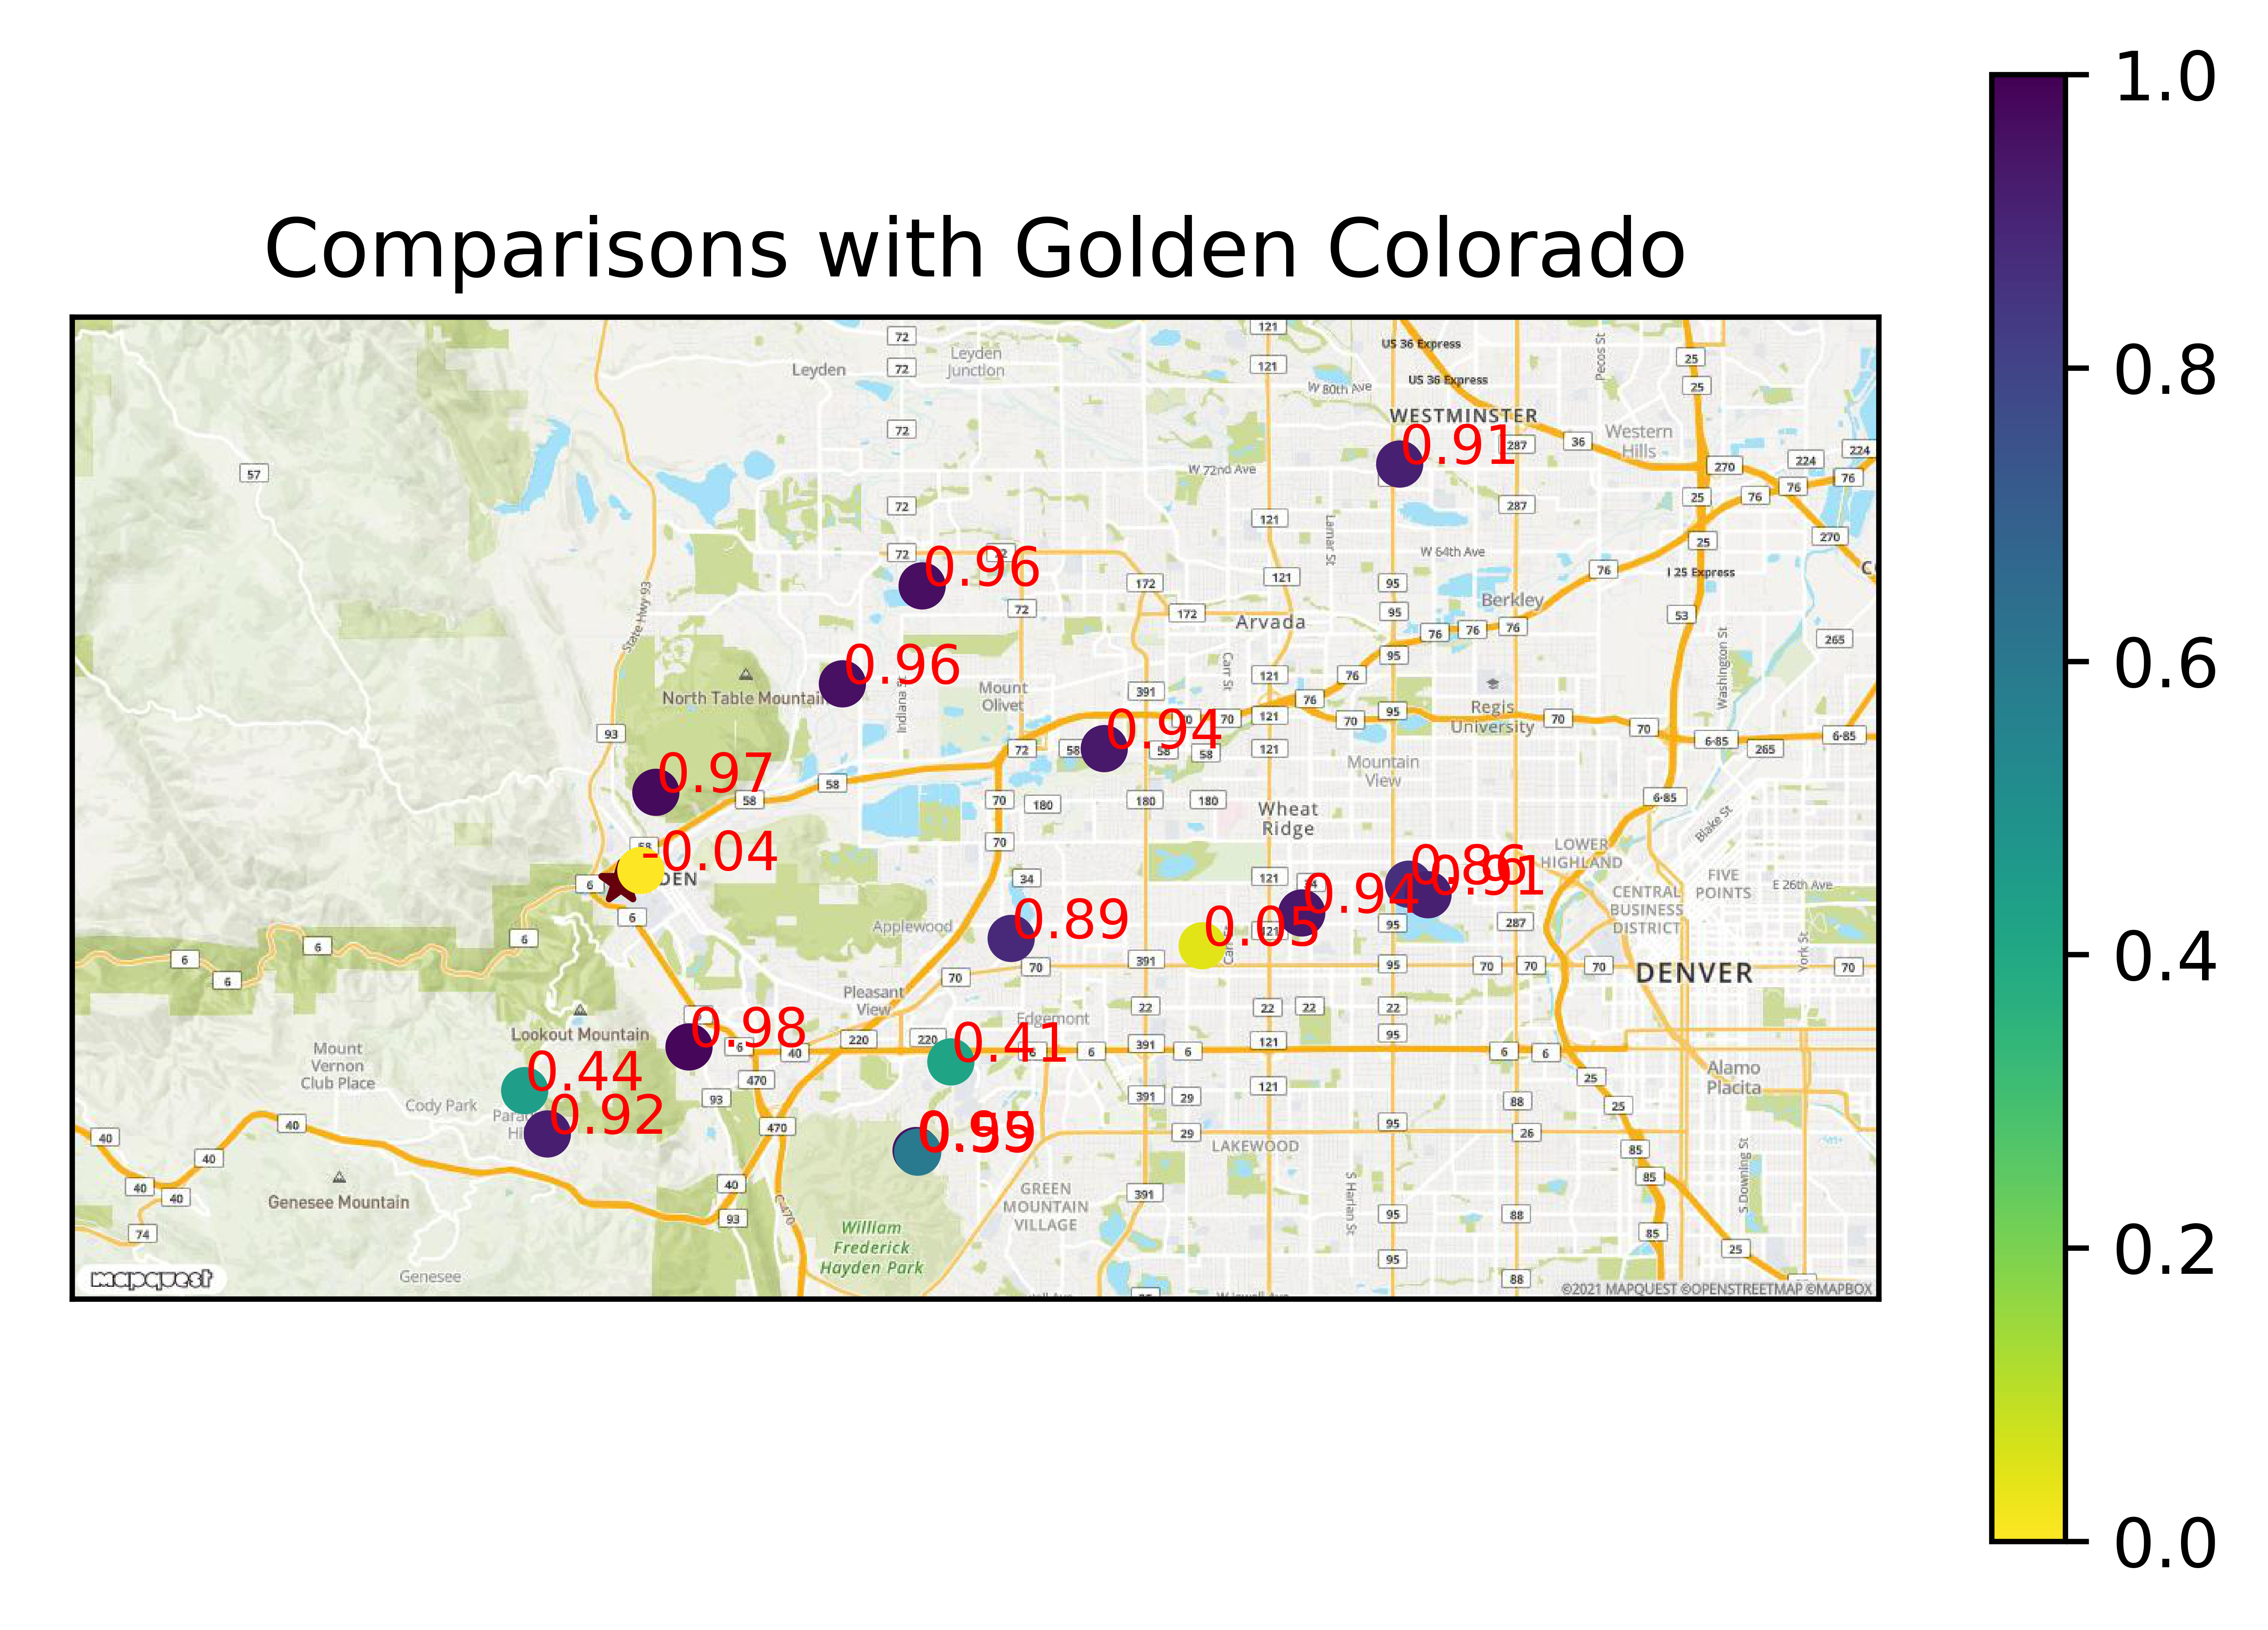

In [3]:
ds.map_correlations(data, "Golden Colorado")

In [4]:
all_max_comparisons, all_lags = ana.get_corr_lag(data, recalculate=False)

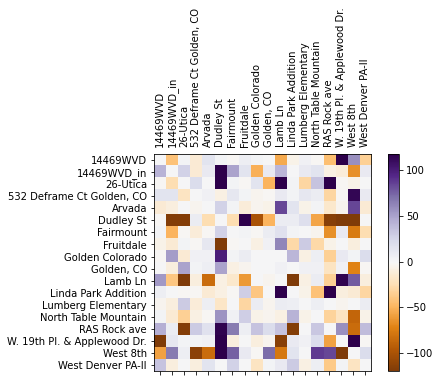

In [5]:
plt.imshow(all_lags, cmap='PuOr')
plt.colorbar()
plt.tick_params(labelbottom=False, labeltop=True)
plt.xticks(range(len(np.unique(data["location"]))), np.unique(data["location"]), rotation=90)
plt.yticks(range(len(np.unique(data["location"]))), np.unique(data["location"]))
plt.show()

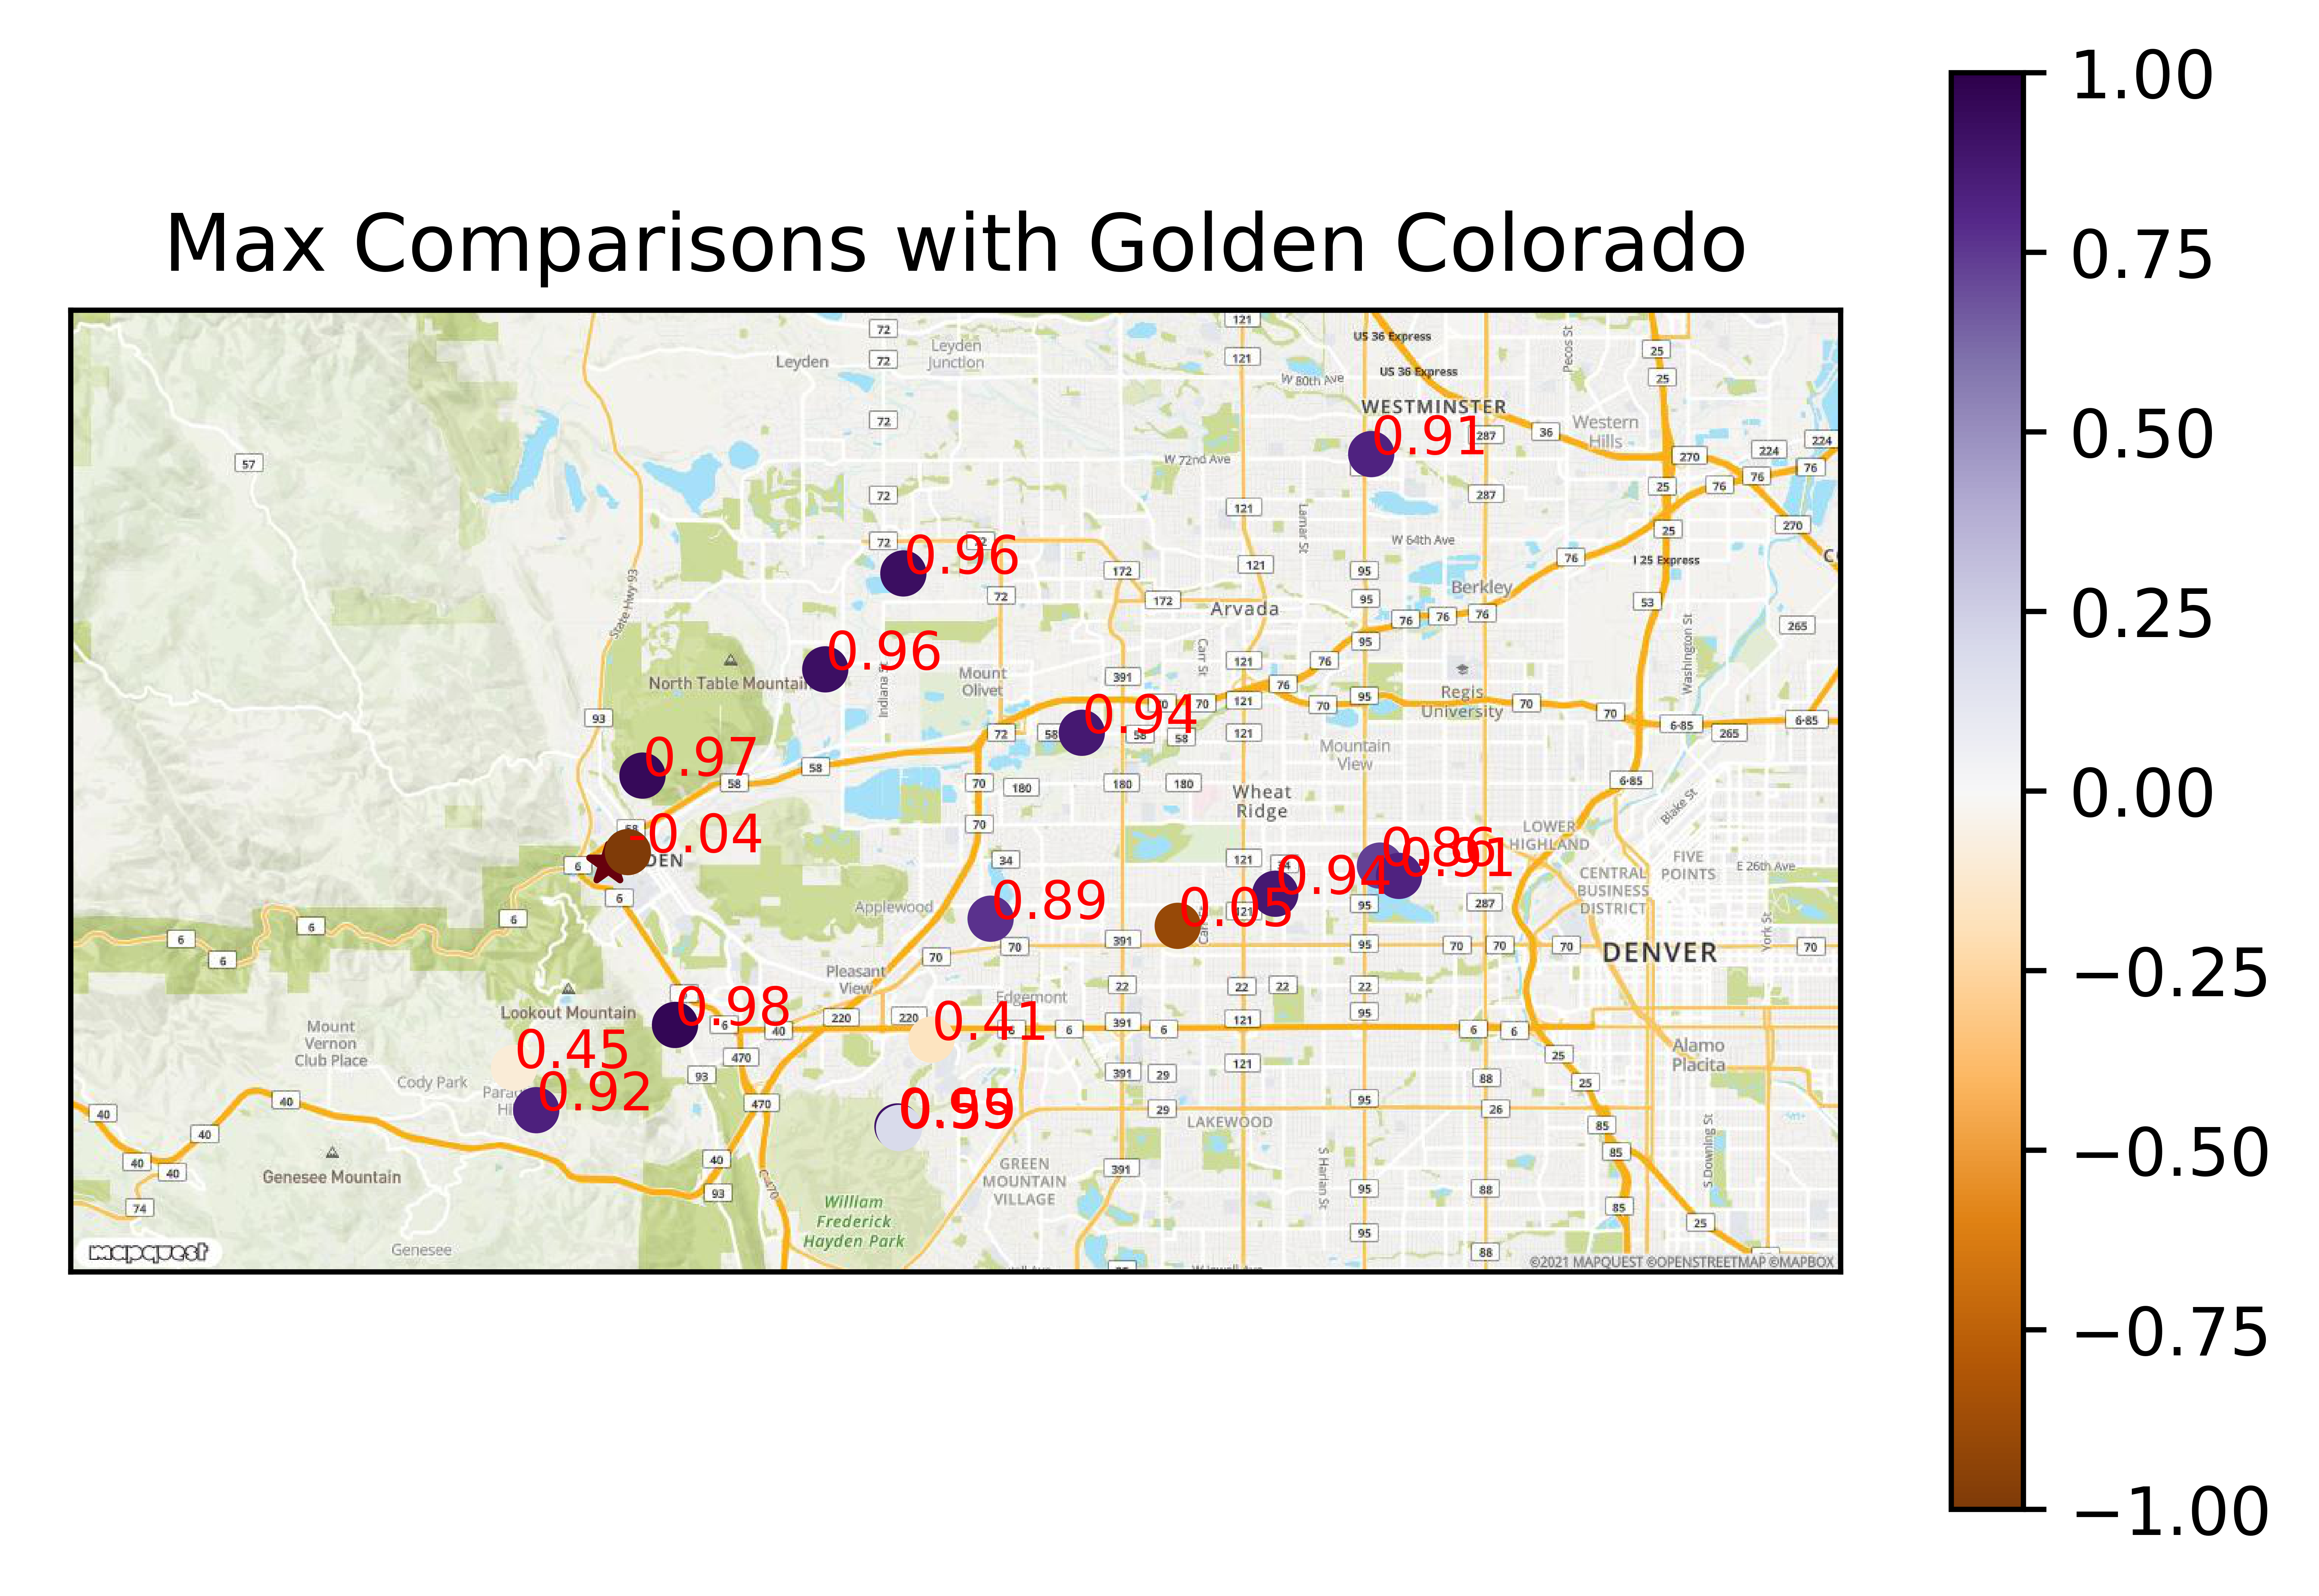

In [16]:
def display_map_reference_helper(data, reference_location, comparison_matrix):
    image = ds.load_img(data, new=False)

    plt.figure(dpi=1200)
    color_map = cm.PuOr
    plt.imshow(image, cmap=color_map)
    plt.clim(-gv.DAYS_LOOKBACK, gv.DAYS_LOOKBACK)
    plt.colorbar()

    for location in np.unique(data["location"]):
        selected_df = data[data["location"] == location]
        lat = selected_df["lat"].iloc[0]
        long = selected_df["long"].iloc[0]

        min_lat = np.min(data["lat"])
        max_lat = np.max(data["lat"])
        min_long = np.min(data["long"])
        max_long = np.max(data["long"])

        width = image.size[0]
        long = width * (long - min_long) / (max_long - min_long)

        height = image.size[1]
        lat = height - height * (lat - min_lat) / (max_lat - min_lat)

        lat = int(0.7 * (lat - height / 2) + height / 2)
        long = int(0.5 * (long - width / 2) + width / 2)

        if location == reference_location:
            color = cm.Reds(1.0)
            plt.scatter(long, lat, c=[color], marker="*")
        else:
            reference_index = np.where(np.unique(data["location"]) == reference_location)[0][0]
            new_index = np.where(np.unique(data["location"]) == location)[0][0]
            corr = comparison_matrix[reference_index][new_index]
            normed_corr = corr / 120 + 0.5
            color = color_map(normed_corr)
            plt.text(long, lat, str(round(corr, 2)), color="red", fontsize=8)
            plt.scatter(long, lat, c=[color])


def display_map_lag(data, reference_location, lag_matrix):
    image = ds.load_img(data, new=False)

    plt.figure(dpi=1200)
    color_map = cm.PuOr
    plt.imshow(image, cmap=color_map)
    plt.clim(-gv.DAYS_LOOKBACK, gv.DAYS_LOOKBACK)
    plt.colorbar()

    for location in np.unique(data["location"]):
        selected_df = data[data["location"] == location]
        lat = selected_df["lat"].iloc[0]
        long = selected_df["long"].iloc[0]

        min_lat = np.min(data["lat"])
        max_lat = np.max(data["lat"])
        min_long = np.min(data["long"])
        max_long = np.max(data["long"])

        width = image.size[0]
        long = width * (long - min_long) / (max_long - min_long)

        height = image.size[1]
        lat = height - height * (lat - min_lat) / (max_lat - min_lat)

        lat = int(0.7 * (lat - height / 2) + height / 2)
        long = int(0.5 * (long - width / 2) + width / 2)

        if location == reference_location:
            color = cm.Reds(1.0)
            plt.scatter(long, lat, c=[color], marker="*")
        else:
            reference_index = np.where(np.unique(data["location"]) == reference_location)[0][0]
            new_index = np.where(np.unique(data["location"]) == location)[0][0]
            corr = lag_matrix[reference_index][new_index]
            normed_corr = corr / 120 + 0.5
            color = color_map(normed_corr)
            plt.text(long, lat, str(round(corr, 2)), color="red", fontsize=8)
            plt.scatter(long, lat, c=[color])

    plt.title("Lag Comparisons with " + reference_location)
    plt.xlabel("(Positive lag means that it happens after the reference)")
    plt.xticks([])
    plt.yticks([])
    plt.show()


def display_map_max_corr(data, reference_location, correlation_matrix):
    image = ds.load_img(data, new=False)

    plt.figure(dpi=1200)
    color_map = cm.PuOr
    plt.imshow(image, cmap=color_map)
    plt.clim(-1, 1)
    plt.colorbar()

    for location in np.unique(data["location"]):
        selected_df = data[data["location"] == location]
        lat = selected_df["lat"].iloc[0]
        long = selected_df["long"].iloc[0]

        min_lat = np.min(data["lat"])
        max_lat = np.max(data["lat"])
        min_long = np.min(data["long"])
        max_long = np.max(data["long"])

        width = image.size[0]
        long = width * (long - min_long) / (max_long - min_long)

        height = image.size[1]
        lat = height - height * (lat - min_lat) / (max_lat - min_lat)

        lat = int(0.7 * (lat - height / 2) + height / 2)
        long = int(0.5 * (long - width / 2) + width / 2)

        if location == reference_location:
            color = cm.Reds(1.0)
            plt.scatter(long, lat, c=[color], marker="*")
        else:
            reference_index = np.where(np.unique(data["location"]) == reference_location)[0][0]
            new_index = np.where(np.unique(data["location"]) == location)[0][0]
            corr = correlation_matrix[reference_index][new_index]
            color = color_map(corr)
            plt.text(long, lat, str(round(corr, 2)), color="red", fontsize=8)
            plt.scatter(long, lat, c=[color])

    plt.title("Max Comparisons with " + reference_location)
    plt.xticks([])
    plt.yticks([])
    plt.show()


# display_map_lag(data, "Golden Colorado", all_lags)

display_map_max_corr(data, "Golden Colorado", all_max_comparisons)